In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib_inline

In [2]:
df =pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df.dropna().reset_index(inplace=True)

In [9]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [10]:
df.dropna(inplace=True)

In [11]:
df['Classes'] =  np.where(df['Classes'].str.contains('not fire'), 0,1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 28.5+ KB


In [13]:
 objects = [obj for obj in df.columns if df[obj].dtype == 'O']

In [14]:
for i in objects:
    df[i] = df[i].astype(float)

In [15]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv' , index=False)

In [16]:
New_df = df.drop(['day', 'month', 'year'] , axis=1 )

In [17]:
New_df.shape

(243, 11)

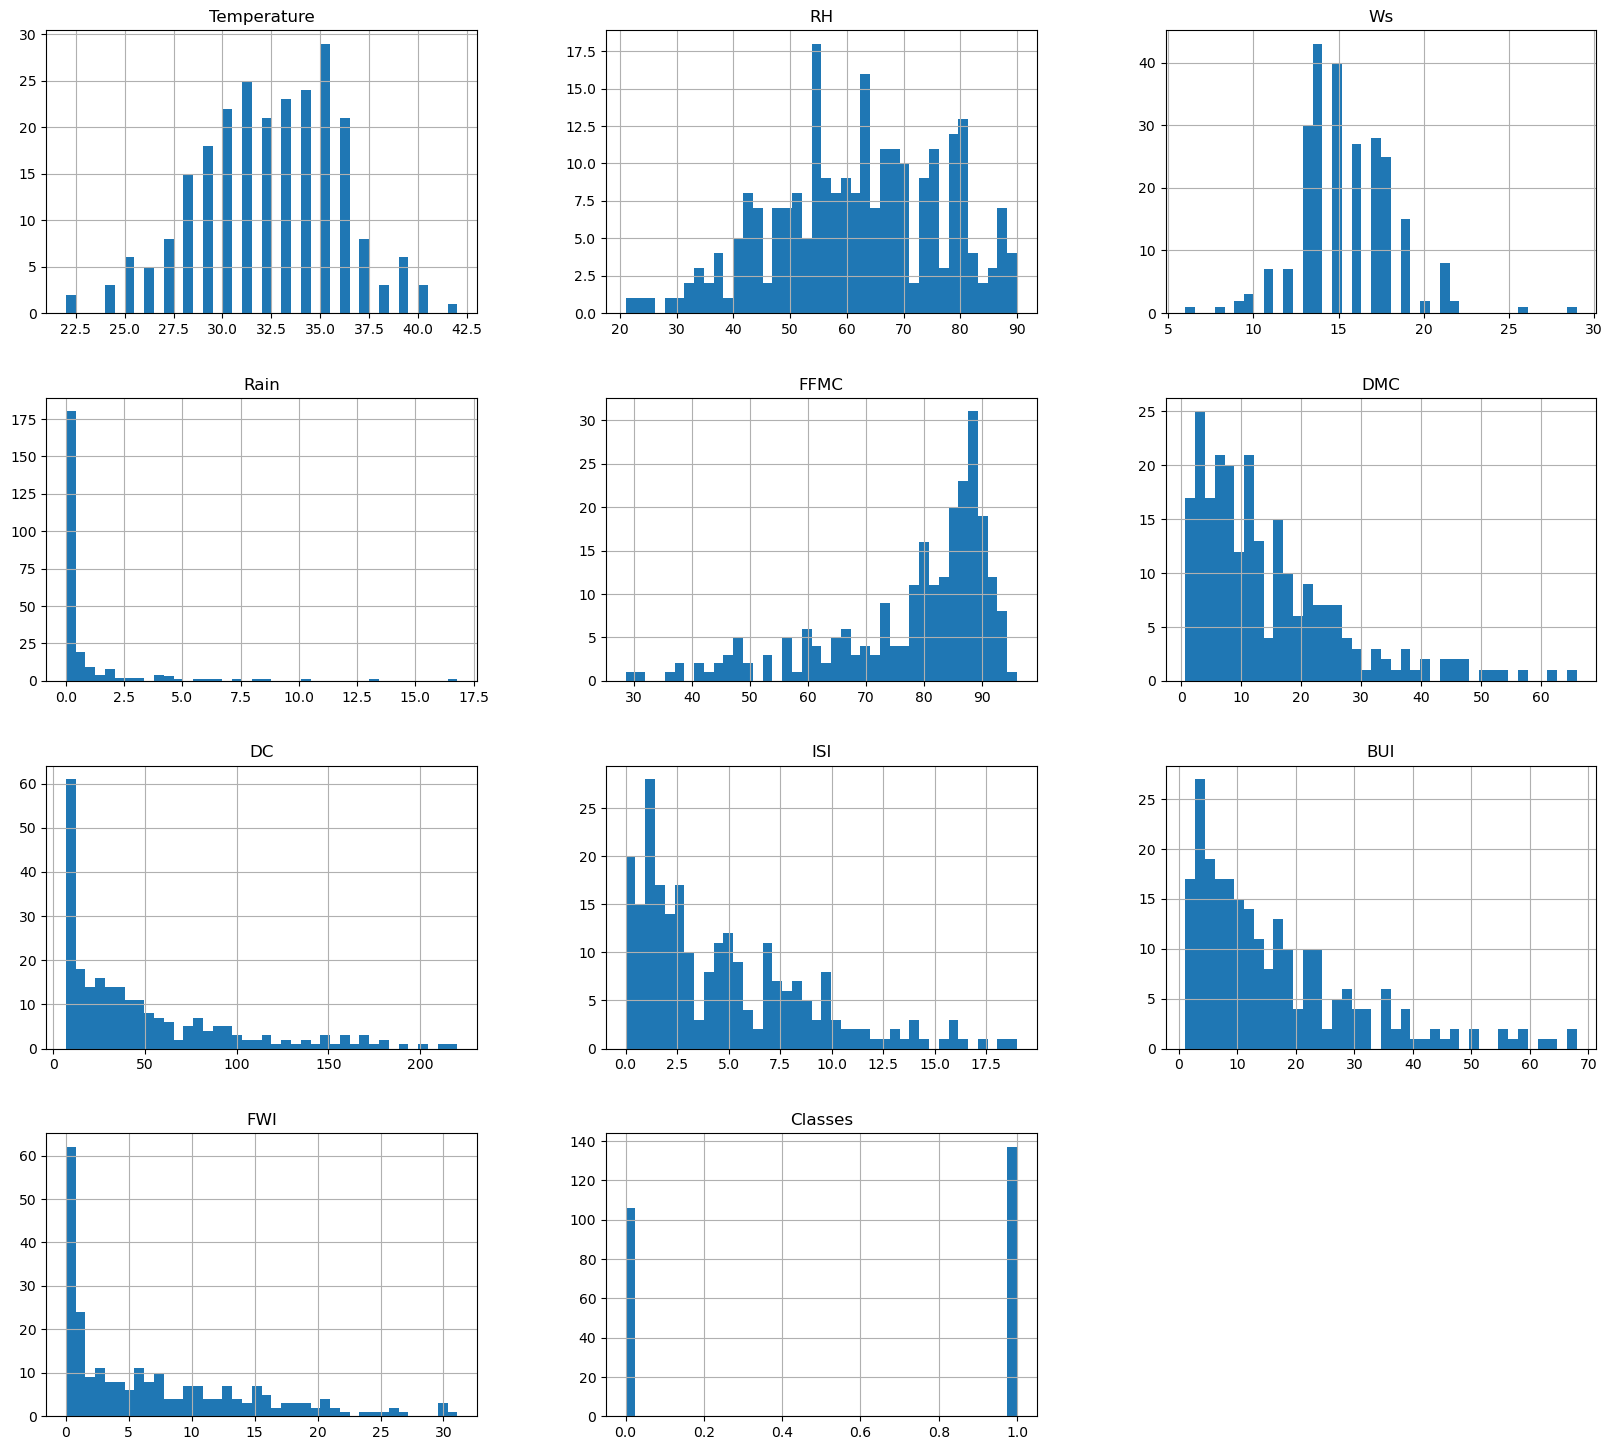

In [18]:
# plt.style.use( 'Seaborn' )
New_df.hist(bins=40, figsize=(20, 18))
plt.show()

## selecting the dependent and independent feature 

In [19]:
New_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [34]:
X = New_df.drop('FWI', axis=1) # independent Feature 
y = New_df['FWI']  # dependent Feature 

## Split The data 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=12)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 10), (73, 10), (170,), (73,))

## Scaling the Data 

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Traning the model 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [80]:
Model = reg.fit(X_train, y_train)

In [44]:
model_pridiction = Model.predict(X_test)

## Checking the Accuracy and mean squard error 

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
Score = r2_score(model_pridiction, y_test)
mse_Lin_Model = mean_squared_error(model_pridiction, y_test)

In [50]:
Score, mse_Lin_Model

(0.9410067190093864, 3.960651058260759)

## Now we are applying the ridge model 

In [52]:
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_model_predict = ridge.predict(X_test)

# finding the score 
Score_ridge = r2_score(ridge_model_predict, y_test)
mse_ridge = mean_squared_error(ridge_model_predict,y_test)

In [60]:
Score_ridge, mse_ridge

(0.9410650566291459, 3.954589740005274)

## Now we are applying the Lasso model

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso = Lasso()
lasso_model = lasso.fit(X_train, y_train)
lasso_model_predict = lasso_model.predict(X_test)

# finding the score 
Score_Lasso = r2_score(Lasso_model_predict, y_test)
mse_Lasso = mean_squared_error(Lasso_model_predict,y_test)

In [65]:
Score_Lasso, mse_Lasso

(0.9461832322600743, 3.326557329742619)

## Now we are applying the ElasticNet model

In [70]:
from sklearn.linear_model import ElasticNet

In [75]:
elastic = ElasticNet()
elastic_model = elastic.fit(X_train,y_train)
elastic_model_predict = elastic_model.predict(X_test)

# finding the score 
Score_elastic = r2_score(elastic_model_predict, y_test)
mse_elastic = mean_squared_error(elastic_model_predict,y_test)

In [76]:
Score_elastic, mse_elastic

(0.9463620320488341, 3.3158557251841274)

In [77]:
import pickle

In [81]:
pickle.dump(scaler, open('scaler.pik', 'wb'))
pickle.dump(reg, open('reg.pik', 'wb'))